In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import generative_model
import plot

In [3]:
model = generative_model.GenerativeModel()

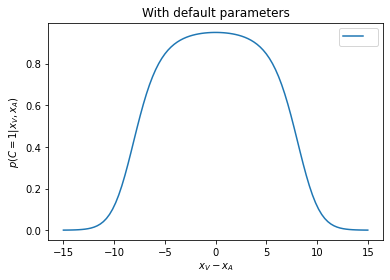

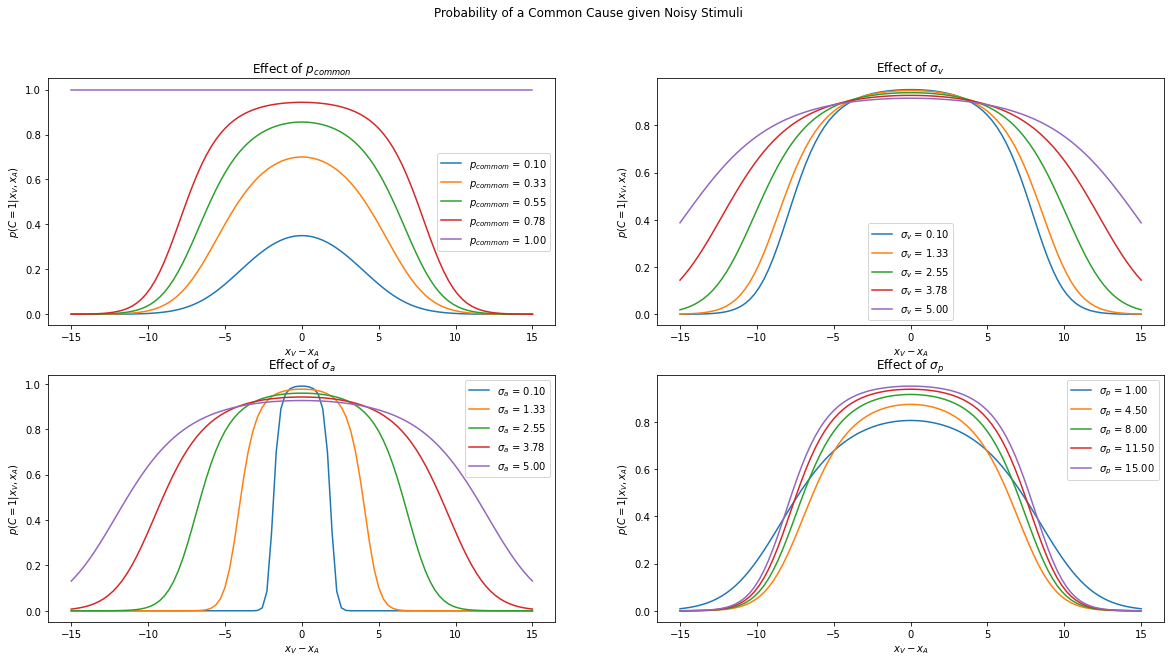

In [4]:
x_v, x_a = np.linspace(-15, 15, 100), 0

plot.plot_figure(x_v-x_a, model.probability_cause(x_v, x_a), '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='With default parameters')
plot.plot_probability_varying_parameters(x_v, x_a, model.probability_cause, '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='Probability of a Common Cause given Noisy Stimuli')

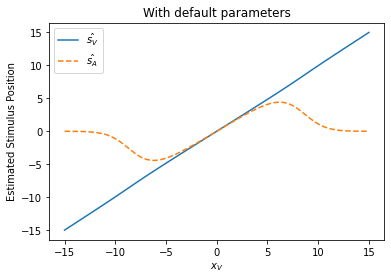

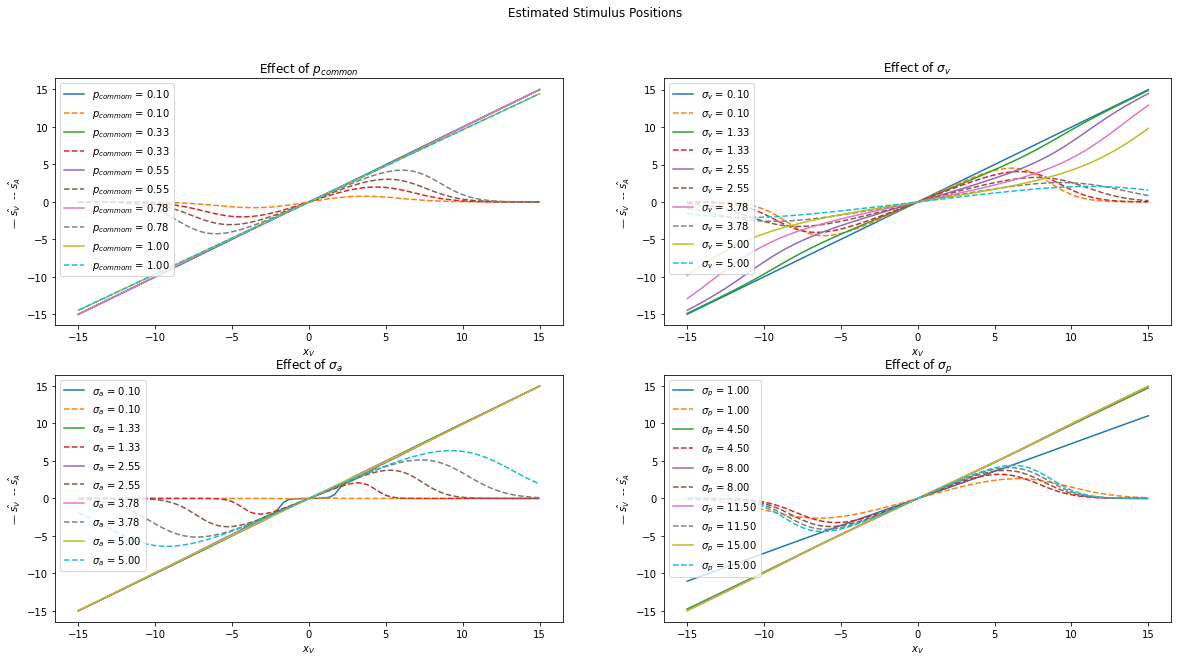

In [5]:
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='video'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_V}$', title='With default parameters')
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='audio'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_A}$', title='With default parameters', fmt='--')

plot.plot_estimate_stimulus_position(x_v, x_a, model.estimate_signal, '$x_V$', '— $\hat{s_V}$  -- $\hat{s_A}$', title='Estimated Stimulus Positions')

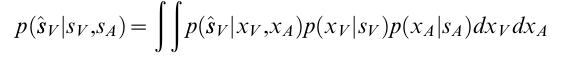

p($\hat{s_V}$|x_V, x_A) is gaussian (think of bayes rule formula).  Hence, the integral is also gaussian (product of gaussians), and hence can be parameterised for analytic evaluation.

In [6]:
#TODO: heatmap for 1.f.

In [7]:
stimulus_pairs, is_common = model.generate_stimulus_pairs(10)
stimulus_pairs, is_common

(array([[ -4.68368994, -10.36408502],
        [-22.01883244, -22.01883244],
        [ -0.15432802,  -0.15432802],
        [ 25.8928691 ,  25.8928691 ],
        [  8.22914109,  11.94768417],
        [ 26.3672063 ,  26.3672063 ],
        [ -8.66668768,  16.88800094],
        [-21.22491171, -21.22491171],
        [  5.75090704,   5.75090704],
        [ -3.01510974,  -3.01510974]]),
 array([False,  True,  True,  True, False,  True, False,  True,  True,
         True]))

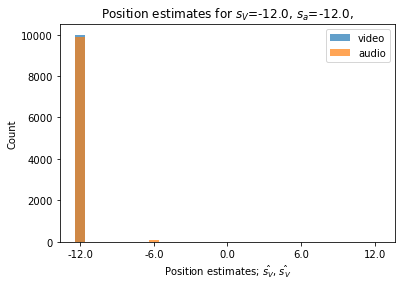

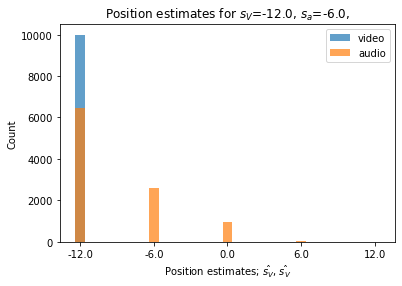

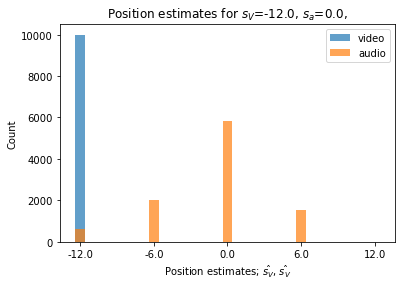

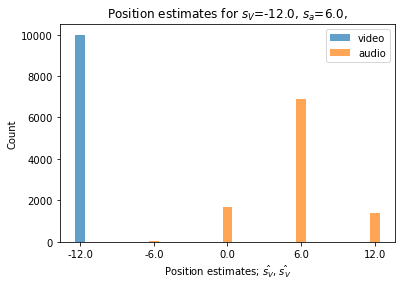

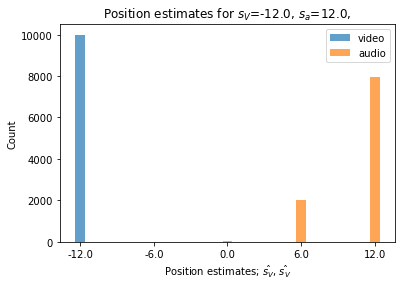

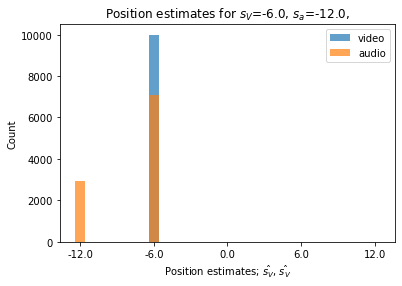

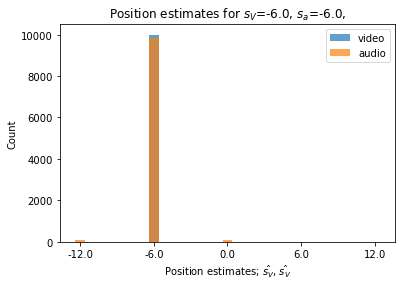

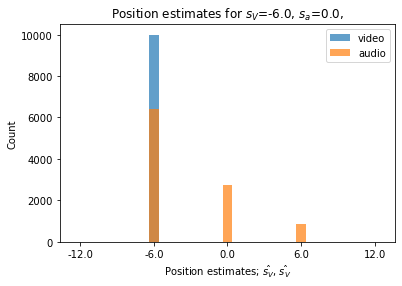

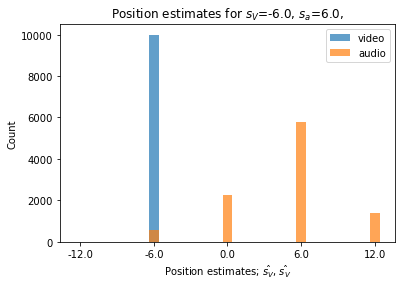

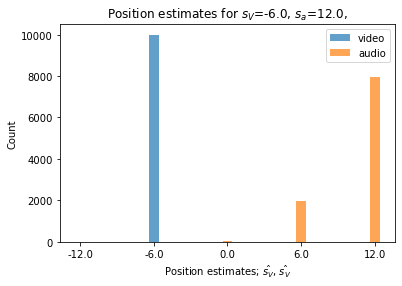

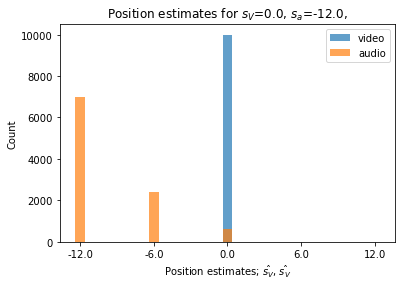

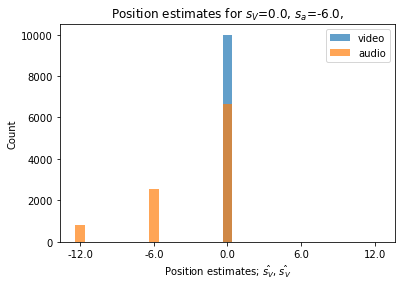

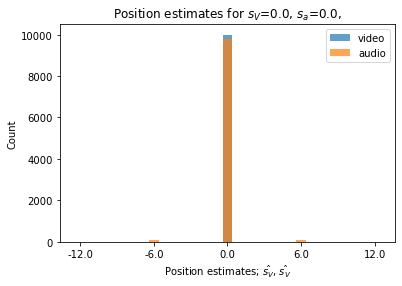

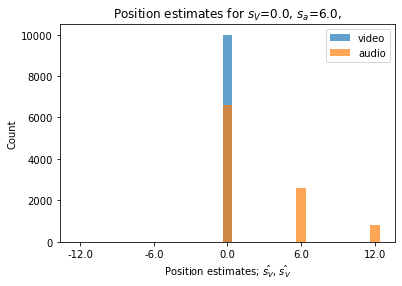

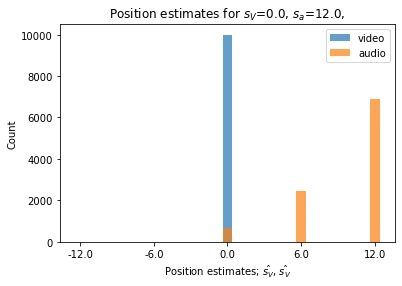

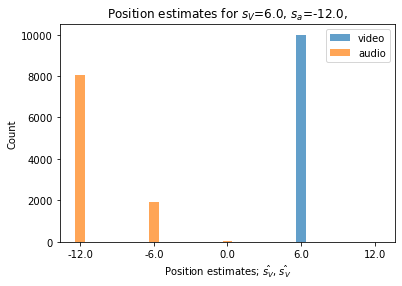

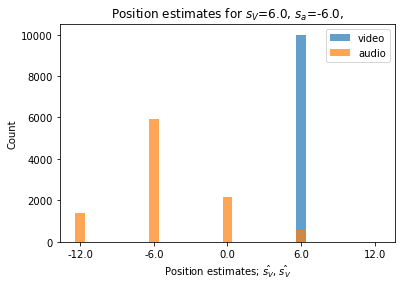

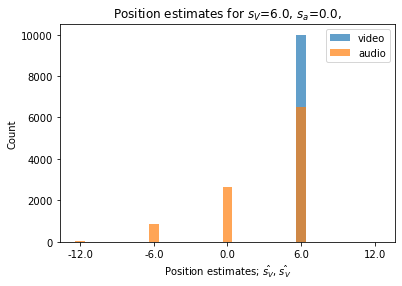

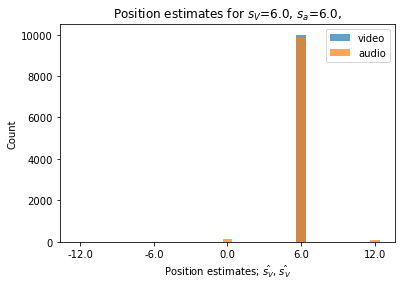

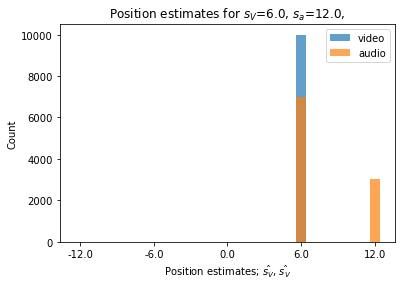

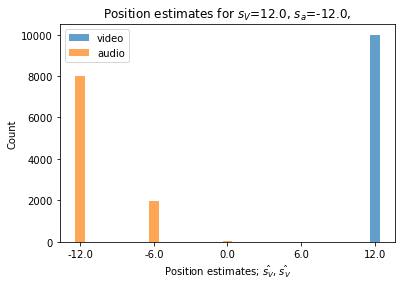

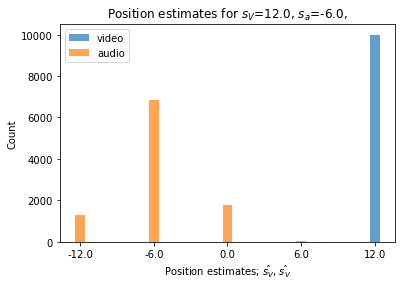

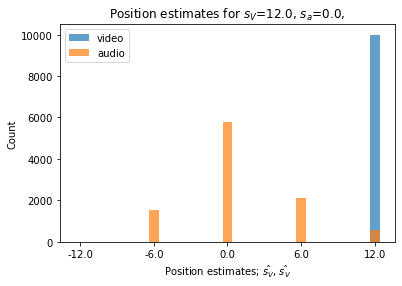

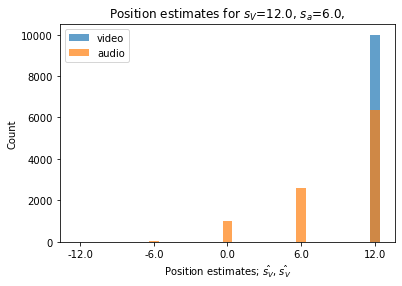

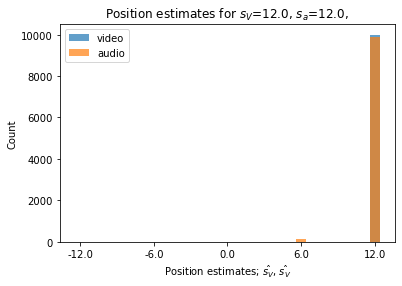

In [30]:
trials = int(1e4)
s_hat_v_hist, s_hat_a_hist = model.make_button_presses(trials)

In [ ]:
loglik = np.zeros(2) # one for s_v, one for s_a

n_a = np.sum(exp_data, axis=0) # observed response counts, per auditory condition
n_v = np.sum(exp_data, axis=1) # ... and visual condition

p_a = np.sum(model_hist, axis=0)/np.sum(model_hist) # probability of button press for each auditory bin
p_v = np.sum(model_hist, axis=1)/np.sum(model_hist) # and for visual bins

loglik[0] = (n_a * np.log(p_a + eps)).sum() # log likelihood for sigma_a
loglik[1] = (n_v * np.log(p_v + eps)).sum() # log likelihood for sigma_v


return loglik.sum() # returns log likelihood of parameters fitting data

In [31]:
#model data
s_hat_v_hist_model, s_hat_a_hist_model = model.make_button_presses(trials*10, plot=False)

In [32]:
n_a = np.sum(s_hat_v_hist) # observed response counts, per auditory condition
n_v = np.sum(s_hat_a_hist) # ... and visual condition

p_a = np.sum(s_hat_v_hist_model)/(np.sum(s_hat_v_hist_model)+np.sum(s_hat_a_hist_model)) # probability of button press for each auditory bin
p_v = np.sum(s_hat_a_hist_model)/(np.sum(s_hat_v_hist_model)+np.sum(s_hat_a_hist_model)) #

In [35]:
# p_a
p_v

0.5